# The Graph Isomorphism Problem

### By Joshua Uzell

<a href="https://www.researchgate.net/figure/Three-isomorphic-representations-of-the-Petersen-graph_fig2_319135421"><img src="https://www.researchgate.net/publication/319135421/figure/fig2/AS:527817386934272@1502852879601/Three-isomorphic-representations-of-the-Petersen-graph.png" alt="Three isomorphic representations of the Petersen graph." style="height:200px;"/></a>
<h6>Fig 2. Three isomorphic representations of the Petersen graph.</h6>

When it comes to <b>Graph Theory</b> in computer science, there are many cases where problems can occur. One of the main ones to occur is the <b>Graph Isomorphism problem</b>. In this notebook, we'll briefly discuss the idea behind Graph Theory, what <b>Graph Isomorphism</b> is and the applications it can be used for, the problem associated with it and the the algorithm that is closest in trying to solve it in an efficient manner. This will be followed by a conclusion section going over what has been learned.

## What is Graph Theory?

Graph Theory is the study of relationships between objects, represented in a visual structure called a graph. It’s about the structure of the relationships, how they are laid out, how they are connected and what we can take from the relationships. Graphs are usually formed by vertices and edges. Vertices/nodes are the objects in the graph represented by circles whereas edges are the connections between those vertices represented by lines. 

<a href="https://www.geeksforgeeks.org/mathematics-graph-theory-basics/"><img src="https://cdncontribute.geeksforgeeks.org/wp-content/uploads/SIMPLE-GRAPH.jpg" alt="Three isomorphic representations of the Petersen graph." style="height:300px;"/></a>
<h6>SIMPLE-GRAPH by Chirag Manwani, 2021.</h6>

In theory, anything can be a graph, from relationships between groups of people to different roads in a city. If you can represent the relationship between a set of objects as a bunch of nodes and have connections between them represented as edges, then it is considered a graph. Lets take a look at how we can plot a simple graph using a python library called networkX which is used specifically for creating and manipulating networks of data in the form of graphs.

The code below shows a simple implementation of a graph. The first line sets the matplotlib backend to inline mode which allows us to show plots in the Jupyter notebook. After that we import the networkx and matplotlib libraries and then we create a complete graph that contains 3 nodes. Each node will be attached to an edge and will have a label to identify with.

In [ ]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

G = nx.complete_graph(3)
nx.draw(G, with_labels=True)

Below is a line of code, that creates a histogram which shows the number of edges that are connected to a given node. This is also referred to as a degree. 

In [ ]:
plt.hist([v for k, v in nx.degree(G)])

From the histogram, we can see on the horizontal line, the number of edges that are connected to a certain node.  Whereas on the vertical line, we can see the number of nodes that have a particular number of edges (a degree). Looking at this data, we can see that from the simple graph we drew, the 3 vertices all have 2 connected edges.

Now that we explored the basic idea of Graph Theory, it's time to cover the main topic of this notebook, **graph isomorphism**.

## What is Graph Isomorphism?

**Graph Isomorphism** is a comparison between two graphs to see if they both look exactly the same structurally. In a description written by Royle from Wolfram MathWorld, he says that **“Two graphs which contain the same number of graph vertices connected in the same way are said to be isomorphic.”**(Royle, no date) which means they have the same structure. If we put two graphs beside eachother and we can see that it’s possible to have a 1 to 1 or bijective mapping between both of their vertices, and the structure and the number of vertices and edges are the same in both graphs, then they are said to be isomorphic. 

## Applications for solving Graph Isomorphism

Regarding applications for **graph isomorphism**, there are a number of different areas such as **computer networks**, where it can be used to check the structure of a network to identify any malicious attacks. Another application would be **image processing** where detecting for similarities between images could be beneficial for technologies like facial recognition. In **social networks**, it would be great for checking for common patterns between social network groups since graphs are useful at representing people and their connections. **Chemistry** is another field it could benefit since molecules could be represented by graphs as well which could aid in designing new medical drugs when checking for structural similarities between molecules.

## The Problem

The issue with **Graph Isomorphism** is that it’s one of the most notoriously difficult problems to solve in computer science. Because of this reputation it is known as an NP (nondeterministic polynomial time) problem. In an article done by John Loeffler from Interesting Engineering, **“NP problems do not have a known algorithm that can produce a result in polynomial time.”** (Loeffler, 2019) meaning that there is no solution to the issue if it were to grow in size. As a result there have been many attempts by various computer scientists to try and solve the **Graph Isomorphism** problem in polynomial time. 

## The Babai Algorithm

The **Babai Alogrithm** is recognised currently as one of the fastest algorithms to solve the graph isomorphism problem. It was created by **László Babai** who is both a computer scientist and a professor at the University of Chicago. (Babai, no date) In 2015, according to Erica Klarreich from Quanta Magazine, Babai had “**electrified the theoretical computer science community**” (Klarreich, 2015) with the introduction of his new algorithm. It appeared to be superior to a previous algorithm that held a 30 year record of being the most efficient at solving this problem. (Klarreich, 2015)

However in 2017, university professor **Harald Helfgott**, found a problem in the **Babai Alogrithm**, relating to an inaccuracy in measuring the time taking to solve the graph isomorphism problem using a divide-and-conquer tool known as the **“Split-or-Johnson”** routine. (Babai, 2017a) A few days later, Babai acknowledged the issue and made a statement on his homepage saying that he replaced a recursive call in the **“Split-or-Johnson”** routine, fixing the issue and then claiming “**that the Graph Isomorphism test runs in quasipolynomial time (now really).**” (Babai, 2017b) Helfgott then updated his blog on January 14th verifying that the proof was correct and that “**Babai is now giving an algorithm that works in quasipolynomial time.**” (valuevar, 2017)

The **Babai Algorithm** has proven to be a major breakthrough for computer science in terms of getting the **graph isomorphism** problem closer to being solved in polynomial time. It’s ability to run in quasipolynomial time means that it would be a great solution for graphs that are of reasonable scale and complexity. The only drawback of this algorithm so far is that due to the complexity of it’s design, it will be some time before any real coding implementation is made for practical use. But regardless, it does show the potential of a quasipolynomial algorithm being used to solve the **Graph Isomorphism** problem.

## A basic solution to the Graph Isomorphism Problem

Even though we don't currently have a perfect solution for graph isomorphism, we can still use the tools we have to make an attempt at a basic solution to the problem and whilst it won't take exponential growth into consideration, it can still be used for solving the issue at a basic level.

First we will import the networkX and matplotlib libraries to create 2 new graphs that each have a list of edges.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the first graph 
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (3, 4)])

Every edge is represented in the list as a tuple. Each tuple contains 2 elements that represent the nodes that are found at the 2 endpoints of a given edge. As an example, we can see from the list above that one of the tuples contains the elements of 1 and 2. This tells us that there is an edge connecting between node 1 and node 2.

Now we will do the same for graph 2 with the same number of nodes and edges, but this time the edges are connected to different nodes.

In [ ]:
# Create the second graph 
G2 = nx.Graph()
G2.add_edges_from([(1, 3), (1, 2), (3, 2), (2, 4), (3, 4)])

Now that we've created each graph, we can use an is_isomorphic function, that takes in 2 graphs as arguements and returns a boolean of true or false depending on whether the 2 graphs are isomorphic to each other or not. 

In [ ]:
# Check if the two graphs are isomorphic
is_isomorphic = nx.is_isomorphic(G1, G2)

Now we will draw out the 2 graphs beside eachother and have every node labeled with a specific number so as to individually identify them.

In [ ]:
# Draw out the 2 graphs
plt.subplot(121)
nx.draw(G1, with_labels=True, node_color='yellow')
plt.title("Graph 1")
plt.subplot(122)
nx.draw(G2, with_labels=True, node_color='blue')
plt.title("Graph 2")

#Print out if the graphs are isomorphic or not
print(is_isomorphic)
print("The graphs below are isomorphic")

# Display the 2 graphs 
plt.show()

In the case of these 2 graphs, the value of is_isomorphic became true, which means that both graphs are isomorphic to one another.

Now lets see what happens when we have 2 graphs that are not isomorphic to eachother.

False
The graphs below are not isomorphic


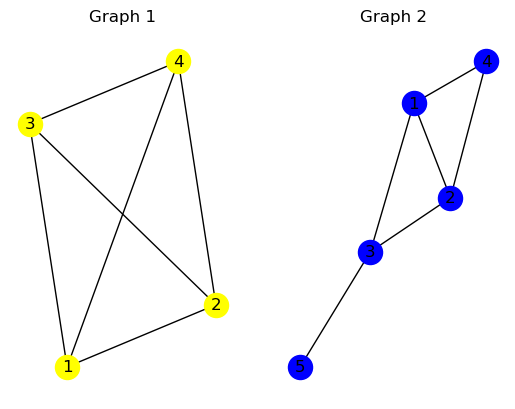

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the first graph 
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)])

# Create the second graph 
G2 = nx.Graph()
G2.add_edges_from([(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 5)])

# Check if the two graphs are isomorphic
is_isomorphic = nx.is_isomorphic(G1, G2)

# Print out if the 2 graphs are isomorphic or not
print(is_isomorphic)
print("The graphs below are not isomorphic")

# Draw out the 2 graphs
plt.subplot(121)
nx.draw(G1, with_labels=True, node_color='yellow')
plt.title("Graph 1")
plt.subplot(122)
nx.draw(G2, with_labels=True, node_color='blue')
plt.title("Graph 2")

# Display the 2 graphs
plt.show()

From the above graph we can see the that the first graph has 4 nodes with 6 edges, and the second graph has 5 nodes with 6 edges. Whilst both graphs have the same number of edges, they don't have the same number of nodes and the edges in both graphs are not aligned in the same way. Therefore, these graphs are not isomorphic to eachother.

## References

Babai, L. (2017a) Fixing the UPCC case of Split-or-Johnson. Available at: http://people.cs.uchicago.edu/~laci/upcc-fix.pdf.

Babai, L. (2017b) Graph Isomorphism January 9, 2017, The University of Chicago. Available at: http://people.cs.uchicago.edu/~laci/update.html.

Babai, L. (no date) László Babai Bruce V. and Diana M. Rauner Distinguished Service Professor, Departments of Computer Science and Mathematics, The University of Chicago. Available at: https://cs.uchicago.edu/people/laszlo-babai/.

Graphettes: Constant-time determination of graphlet and orbit identity including (possibly disconnected) graphlets up to size 8 - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/Three-isomorphic-representations-of-the-Petersen-graph_fig2_319135421 [accessed 6 Feb, 2023]

Loeffler, J. (2019) ‘P vs NP, NP-Complete, and an Algorithm for Everything’, Interesting Engineering, May. Available at: https://interestingengineering.com/innovation/p-vs-np-np-complete-and-an-algorithm-for-everything.

Klarreich, E. (2015) ‘Landmark Algorithm Breaks 30-Year Impasse’, Quanta Magazine, December. Available at: https://www.quantamagazine.org/algorithm-solves-graph-isomorphism-in-record-time-20151214.

Manwani, C. (2021) SIMPLE-GRAPH. Available at: https://www.geeksforgeeks.org/mathematics-graph-theory-basics/ [accessed 3 March, 2023]

Tolley, T. R., Franceschini, R. W. and Petty, M. D. (1995) Graph Isomorphism Algorithms: Investigation Of The Graph Isomorphism Problem. Available at: https://stars.library.ucf.edu/cgi/viewcontent.cgi?article=1105&context=istlibrary.

valuevar (2017) Graph isomorphism in subexponential time. Available at: https://valuevar.wordpress.com/2017/01/04/graph-isomorphism-in-subexponential-time/.

## End